In [ ]:
# using TA-Lib
# http://mrjbq7.github.io/ta-lib/install.html

# copy from Pythonで簡単なモメンタム投資モデルを作る http://qiita.com/sawadybomb/items/9dc9d858aa399c8b4011

In [9]:
%matplotlib inline
from db import DB
import datetime as dt
import sqlite3
import pandas.io.sql as psql
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import pandas.tseries.offsets as offsets
from ipywidgets import interact

In [10]:
ta.get_function_groups

<function talib.get_function_groups>

In [40]:
db = DB(4293)
data = db.read()
# 9433 KDDI

code_4293: The table found


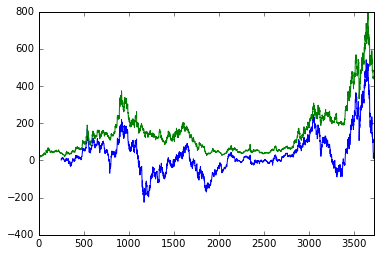

In [41]:
data['momentam'] = ta.MOM(data['close'].values,250)
data['momentam'].plot()
data['close'].plot()

In [42]:
momentum = ta.MOM(data['close'].values,250)

length = len(data.index)
cash = [None for row in range(length)]
position = [None for row in range(length)]
asset = [None for row in range(length)]

cash[0] = 100000
position[0] = 0

for i, (index, row) in enumerate(data.iterrows()):
    if i > 0:
        cash[i] = cash[i-1]
        position[i] = position[i-1]
        
        if momentum[i] > 0 and momentum[i-1] < 0:
            amount = cash[i] // row['close']
            position[i] += amount
            cash[i] -= amount * row['close'] + 150
        
        elif momentum[i] < 0 and momentum[i-1] > 0:
            cash[i] += position[i] * row['close'] - 150
            position[i] =0
    asset[i] = cash[i] + position[i] * row['close']

data['asset'] = asset


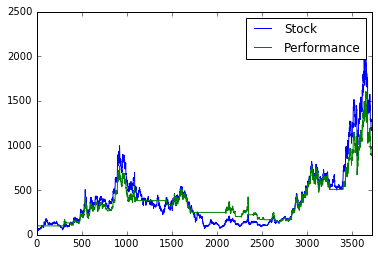

In [43]:
# plot result
d2 = pd.DataFrame()
d2['Stock'] = data['close'] / data['close'][0] * 100
d2['Performance'] = asset
d2['Performance'] = d2['Performance'] / asset[0] * 100

d2.plot()
plt.show()


In [35]:
data['close'][0]

2400.0